In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statistics as st

# Reading the dataset

In [2]:
df=pd.read_excel("Dataset_w6.xlsx")

In [3]:
df

,country,Region,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
0,Afghanistan,SouthernAsia,652864.0,35530.0,623.2,125.0,3568.0
1,Albania,SouthernEurope,28748.0,2930.0,3984.2,134.0,4669.0
2,Algeria,NorthernAfrica,2381741.0,41318.0,4154.1,160.0,47091.0
3,Angola,MiddleAfrica,1246700.0,29784.0,4714.1,175.0,8790.0
4,Antigua and Barbuda,Caribbean,442.0,102.0,14764.5,88.0,491.0
...,...,...,...,...,...,...,...
191,Venezuela (Bolivarian Republic of),SouthAmerica,912050.0,31977.0,11068.9,118.0,16324.0
192,Viet Nam,South-easternAsia,330967.0,95541.0,2067.9,136.0,174111.0
193,Yemen,WesternAsia,527968.0,28250.0,1106.4,136.0,6861.0
194,Zambia,EasternAfrica,752612.0,17094.0,1311.1,179.0,7442.0


# Checking for null values

In [4]:
df.isna().sum()

country                                       0
Region                                        0
Surface area (km2)                            0
Population in thousands (2017)                0
GDP per capita (current US$)                  0
Agricultural production index                 0
International trade: Imports (million US$)    0
dtype: int64

In [5]:
df.describe()

,Surface area (km2),Population in thousands (2017),GDP per capita (current US$),Agricultural production index,International trade: Imports (million US$)
count,1.960000e+02,1.960000e+02,196.000000,196.000000,1.960000e+02
mean,6.787071e+05,3.796658e+04,13727.343367,117.066327,7.996138e+04
std,1.914200e+06,1.434228e+05,18995.593914,25.521247,2.340416e+05
min,2.600000e+01,5.000000e+00,144.500000,34.000000,1.200000e+01
25%,2.084900e+04,1.462000e+03,1840.725000,102.000000,2.162500e+03
50%,1.136275e+05,7.677500e+03,5463.450000,114.000000,8.255500e+03
75%,5.077380e+05,2.624075e+04,15849.550000,133.250000,4.612275e+04
max,1.709825e+07,1.409517e+06,100160.800000,199.000000,2.249661e+06


# 1. Find out how many countries are there in the dataset

In [6]:
df["country"].nunique()

196

# 2. Find out how many countries with respect to the region are available in the dataset

In [7]:
df["Region"].value_counts()

WesternAsia          18
EasternAfrica        17
Caribbean            16
WesternAfrica        15
SouthAmerica         12
SouthernEurope       12
South-easternAsia    11
EasternEurope        10
NorthernEurope       10
SouthernAsia          9
MiddleAfrica          9
CentralAmerica        8
WesternEurope         7
EasternAsia           7
SouthernAfrica        5
Polynesia             5
NorthernAfrica        5
Melanesia             5
CentralAsia           5
NorthernAmerica       4
Micronesia            4
Oceania               2
Name: Region, dtype: int64

C:\Users\ollak\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


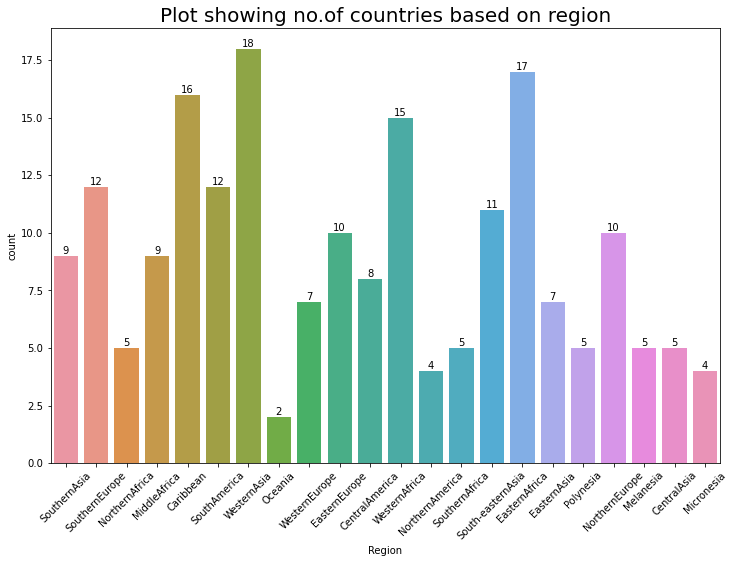

In [8]:
plt.figure(figsize=(12,8))
ds=sns.countplot(df["Region"])
for i in ds.containers:
    ds.bar_label(i)
plt.title("Plot showing no.of countries based on region",fontsize=20)
plt.xticks(rotation=45)
plt.show()

Plot shows the no.of countries based on various regions:
    
    SouthernAsia = 9    
    SouthernEurope = 12    
    NorthernAfrica = 5    
    MiddleAfrica = 16    
    Caribbean = 16    
    SouthAmerica = 12    
    WesternAsia = 18    
    Oceania = 2    
    Western Europe = 7    
    Eastern Europe = 10    
    CentralAmerica = 8    
    WesternAfrica = 15    
    NorthernAmerica = 4    
    SouthernAfrica = 5    
    SoutheasternAsia = 11    
    EasternAfrica = 17   
    EasternAsia = 7    
    Polynesia = 5    
    NorthernEurope = 10    
    Melanesia = 5    
    CentralAsia = 5   
    Micronesia = 4
    

# 3. On average which region has the highest


# a. GDP per capita (current US$)

In [18]:
gdp=df.groupby("Region")["GDP per capita (current US$)"].mean()  

In [21]:
ds1=gdp.to_frame()
ds1.sort_values("GDP per capita (current US$)",ascending=False)

,GDP per capita (current US$)
Region,
NorthernAmerica,57659.000000
WesternEurope,55387.128571
Oceania,44823.250000
NorthernEurope,42098.220000
EasternAsia,27967.614286
WesternAsia,17013.938889
Caribbean,15135.562500
SouthernEurope,14462.741667
South-easternAsia,10299.027273


It shows that NorthernAmerica has highest average GDP ie 57659.0

# b. International trade: Imports (million US$)

In [12]:
intnl_trade=df.groupby("Region")["International trade: Imports (million US$)"].mean()

In [22]:
ds2=intnl_trade.to_frame()
ds2.sort_values("International trade: Imports (million US$)",ascending=False)

,International trade: Imports (million US$)
Region,
NorthernAmerica,663552.250000
EasternAsia,451995.000000
WesternEurope,407498.428571
NorthernEurope,113407.200000
Oceania,112914.500000
South-easternAsia,98324.636364
EasternEurope,85243.900000
SouthernEurope,76666.666667
SouthernAsia,58199.333333


It shows that North America has the highest International trade imports ie 663552.25 in US$

# 4. Find out which region has more consistent with respect to GDP per capita (current US$)

In [27]:
ds3 = df[['Region','GDP per capita (current US$)']]

In [32]:
ds3.groupby(["Region"])['GDP per capita (current US$)'].std().sort_values()

Region
WesternAfrica          815.095399
NorthernAfrica         974.706575
SouthernAfrica        2177.551120
SouthernAsia          2855.708179
EasternAfrica         3716.131770
CentralAsia           4152.215490
CentralAmerica        4180.440883
SouthAmerica          4273.707394
Micronesia            4820.669694
MiddleAfrica          5274.846281
EasternEurope         5415.488739
Polynesia             6956.250286
Oceania               9233.329638
SouthernEurope        9541.703216
Melanesia            13855.842686
Caribbean            14579.371326
South-easternAsia    16311.810656
WesternAsia          18812.151459
NorthernEurope       20671.030185
WesternEurope        24770.467728
NorthernAmerica      25749.619445
EasternAsia          27485.120923
Name: GDP per capita (current US$), dtype: float64

The list of countries with respect to the  GDP per capita shows more consistency when the standard deviation in minimum.

Therefore WesternAfrica is the more consistent region w.r.to GDP per capita (current US$).